In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/CIC-IDS2017/

MachineLearningCSV.zip	MachineLearningCVE


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 88             640                   7   
1                 88             900                   9   
2                 88            1205                   7   
3                 88             511                   7   
4                 88             773                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        4                          440   
1                        4                          600   
2                        4                         2776   
3                        4                          452   
4                        4                          612   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           358                     220   
1                          2944                     300   
2                          2830                    1388   
3                           370                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 24065


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (421844, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 161


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")

Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Flow Duration', 'Bwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
('Total Length of Fwd Packets', ' Subflow Fwd Bytes')
(' Total Length of Bwd Packets', 'Subflow Fwd Packets')
(' Total Length of Bwd Packets', ' Subflow Bwd Packets')
(' Total Length of Bwd Packets', ' Subflow Bwd Bytes')
(' Fwd Packet Length Max', ' Fwd Packet Length Std')
(' Fwd Packet Length Mean', ' Avg Fwd Segment Size')
('Bwd Packet Length Max', ' Bwd Packet Length Mean')
('Bwd Packet Length Max', ' Bwd Packe

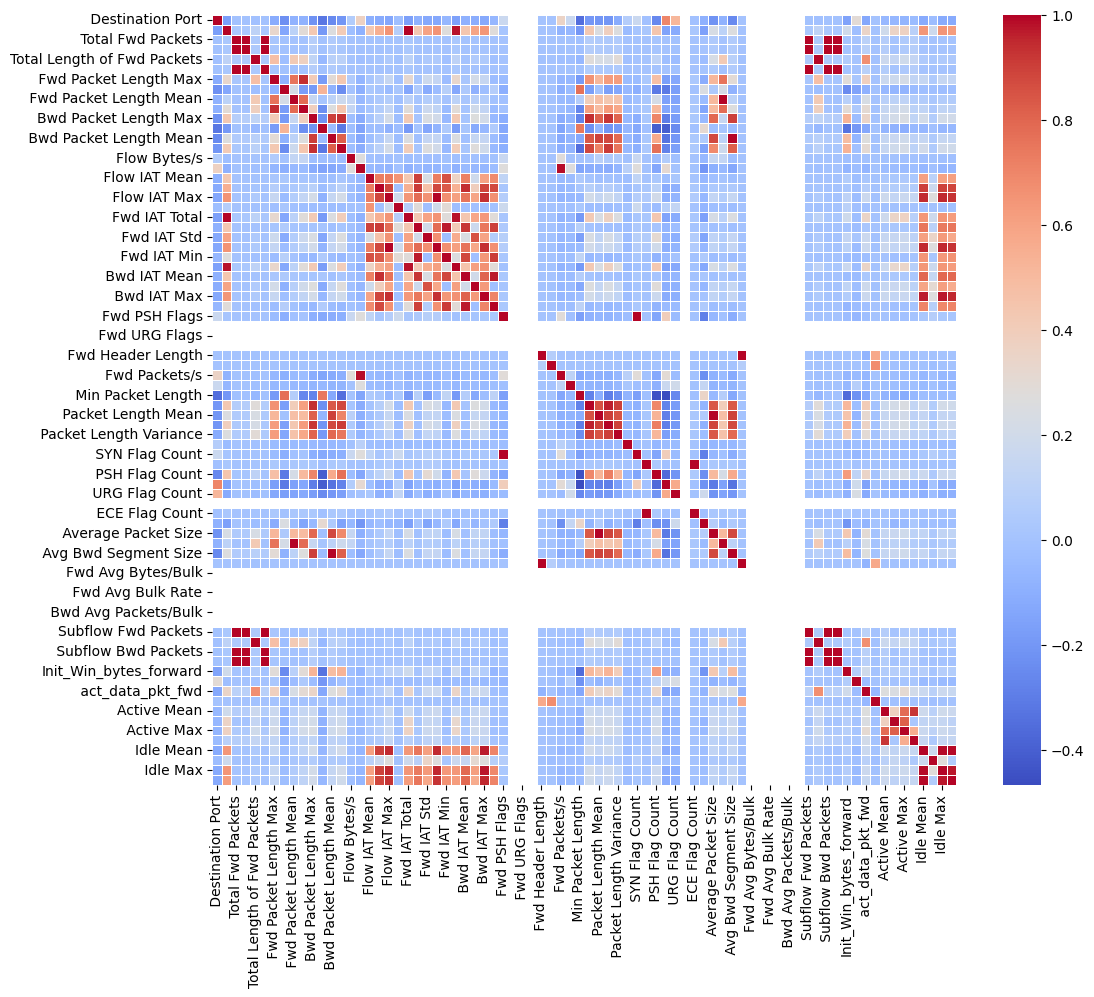

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()


Dropping 29 highly correlated features:
{' Bwd IAT Mean', ' Total Backward Packets', ' Packet Length Std', ' Idle Min', ' Fwd IAT Mean', 'Fwd IAT Total', 'Subflow Fwd Packets', ' Idle Max', ' Subflow Bwd Packets', ' Bwd IAT Max', ' Subflow Fwd Bytes', ' SYN Flag Count', ' Fwd IAT Max', ' Bwd IAT Min', 'Idle Mean', ' Fwd Header Length.1', ' ECE Flag Count', ' Total Length of Bwd Packets', ' Bwd Packet Length Mean', ' Active Min', ' Bwd Packet Length Std', ' Average Packet Size', 'Fwd Packets/s', ' Subflow Bwd Bytes', ' Max Packet Length', 'Bwd IAT Total', ' Avg Fwd Segment Size', ' Fwd Packet Length Std', ' Avg Bwd Segment Size'}


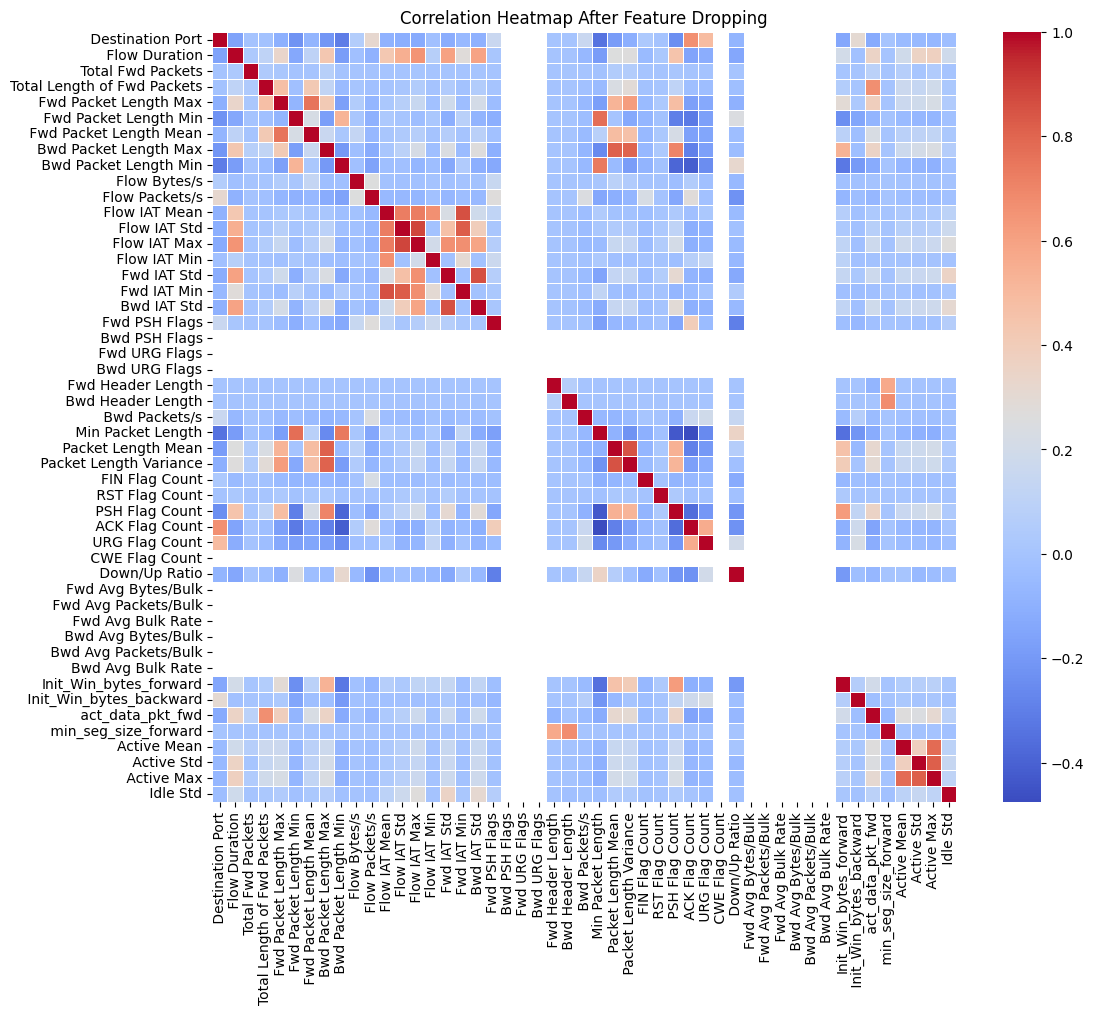

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Flow Bytes/s    201
dtype: int64


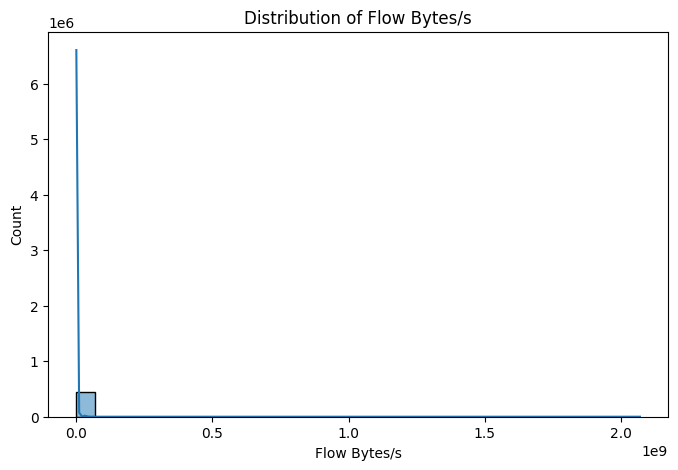

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)


In [ ]:
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())

In [ ]:
df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])

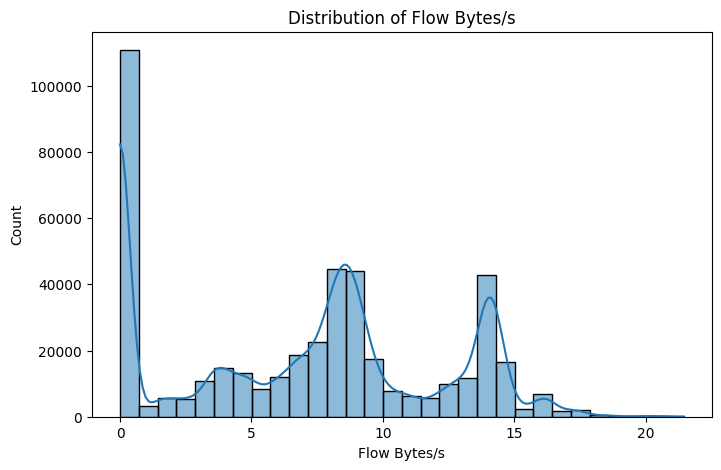

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'FTP-Patator' 'SSH-Patator']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define labels
labels = ['BENIGN', 'FTP-Patator', 'SSH-Patator']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])

# Mapping of labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'BENIGN': 0, 'FTP-Patator': 1, 'SSH-Patator': 2}


In [ ]:
print(df_cleaned[' Label'].unique())

[0 1 2]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())

 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
Total Length of Fwd Packets      0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
Flow Bytes/s                     0
 Flow Packets/s                264
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
 Fwd IAT Std                     0
 Fwd IAT Min                     0
 Bwd IAT Std                     0
Fwd PSH Flags                    0
 Bwd PSH Flags                   0
 Fwd URG Flags                   0
 Bwd URG Flags                   0
 Fwd Header Length               0
 Bwd Header Length               0
 Bwd Packets/s                   0
 Min Packet Length               0
 Packet Length Mean              0
 Packet Length Variance          0
FIN Flag Count      

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


<ipython-input-22-98b65e27ec3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Fwd Header Length             0
 Bwd Header Length             0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag 

In [ ]:
print(df_cleaned.isna().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Fwd Header Length             0
 Bwd Header Length             0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag 

Train test split

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MLP

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9870 - loss: 0.0374 - val_accuracy: 0.9975 - val_loss: 0.0115
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9946 - val_loss: 0.0131
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9971 - val_loss: 0.0070
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.9992 - val_loss: 0.0049
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9991 - val_loss: 0.0039
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Test Accuracy: 0.999249
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       0.99      0.99      0.99      1574
           2       0.99      0.98      0.98      1197

    accuracy                           1.00     89182
   macro avg       0.99      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



1D CNN (Convolutional Neural Network) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 124s 11ms/step - accuracy: 0.9887 - loss: 0.0342 - val_accuracy: 0.9961 - val_loss: 0.0106
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.9983 - loss: 0.0070 - val_accuracy: 0.9988 - val_loss: 0.0049
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 141s 10ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 110s 10ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 142s 10ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9988 - val_loss: 0.0051
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 144s 10ms/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 139s 10ms/s

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Test Accuracy: 0.999596
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       1.00      1.00      1.00      1574
           2       0.99      0.98      0.99      1197

    accuracy                           1.00     89182
   macro avg       1.00      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



LSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 119s 10ms/step - accuracy: 0.9882 - loss: 0.0482 - val_accuracy: 0.9930 - val_loss: 0.0166
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9980 - val_loss: 0.0062
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 140s 8ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9985 - val_loss: 0.0060
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9990 - val_loss: 0.0046
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9989 - val_loss: 0.0038
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - acc

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Test Accuracy: 0.999114
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       0.99      1.00      0.99      1574
           2       0.96      0.98      0.97      1197

    accuracy                           1.00     89182
   macro avg       0.98      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



CNN+LSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 253s 22ms/step - accuracy: 0.9850 - loss: 0.0570 - val_accuracy: 0.9990 - val_loss: 0.0056
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 264s 22ms/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 249s 22ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 259s 22ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9990 - val_loss: 0.0034
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 257s 22ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 263s 24ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 300s 22ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 261s 22ms/s

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
Test Accuracy: 0.999473
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       1.00      1.00      1.00      1574
           2       0.98      0.98      0.98      1197

    accuracy                           1.00     89182
   macro avg       0.99      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



GRU (Gated Recurrent Unit) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - accuracy: 0.9889 - loss: 0.0408 - val_accuracy: 0.9955 - val_loss: 0.0104
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9954 - val_loss: 0.0083
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9984 - val_loss: 0.0051
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - accuracy: 0.9988 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Test Accuracy: 0.999439
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       0.99      1.00      1.00      1574
           2       0.99      0.98      0.98      1197

    accuracy                           1.00     89182
   macro avg       0.99      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



BiLSTM Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 158s 13ms/step - accuracy: 0.9905 - loss: 0.0370 - val_accuracy: 0.9978 - val_loss: 0.0085
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 208s 14ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.9985 - val_loss: 0.0061
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 204s 14ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9985 - val_loss: 0.0051
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 191s 13ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 200s 13ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 202s 13ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 214s 14ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 191s 13ms/s

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
Test Accuracy: 0.998385
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       0.99      1.00      0.99      1574
           2       0.96      0.93      0.94      1197

    accuracy                           1.00     89182
   macro avg       0.98      0.98      0.98     89182
weighted avg       1.00      1.00      1.00     89182



CNN+BiLSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 261s 23ms/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.9986 - val_loss: 0.0059
Epoch 2/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 252s 22ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 3/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 261s 22ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 263s 22ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 5/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 252s 23ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 6/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 264s 23ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 7/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 257s 22ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 8/20
11148/11148 ━━━━━━━━━━━━━━━━━━━━ 254s 23ms/s

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))

2787/2787 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step
Test Accuracy: 0.999619
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86411
           1       1.00      1.00      1.00      1574
           2       0.99      0.98      0.99      1197

    accuracy                           1.00     89182
   macro avg       1.00      0.99      0.99     89182
weighted avg       1.00      1.00      1.00     89182



DBN Model Implementation

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 109.94 seconds
Precision: 0.938823
Recall: 0.968929
F1-Score: 0.953638

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     86411
           1       0.00      0.00      0.00      1574
           2       0.00      0.00      0.00      1197

    accuracy                           0.97     89182
   macro avg       0.32      0.33      0.33     89182
weighted avg       0.94      0.97      0.95     89182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))

Test Accuracy: 0.968929
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     86411
           1       0.00      0.00      0.00      1574
           2       0.00      0.00      0.00      1197

    accuracy                           0.97     89182
   macro avg       0.32      0.33      0.33     89182
weighted avg       0.94      0.97      0.95     89182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Precision": [precision_mlp, precision_cnn, precision_lstm, precision_cnn_lstm, precision_gru, precision_bilstm, precision_cnn_bilstm, precision_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding Precision values
precision_scores = [precision_mlp, precision_cnn, precision_lstm, precision_cnn_lstm, precision_gru, precision_bilstm, precision_cnn_bilstm, precision_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, precision_scores, color='gold', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Precision")
plt.title("Precision Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming Precision ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()


Recall

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Recall": [recall_mlp, recall_cnn, recall_lstm, recall_cnn_lstm, recall_gru, recall_bilstm, recall_cnn_bilstm, recall_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding Recall values
recall_scores = [recall_mlp, recall_cnn, recall_lstm, recall_cnn_lstm, recall_gru, recall_bilstm, recall_cnn_bilstm, recall_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, recall_scores, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Recall")
plt.title("Recall Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming Recall ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()


F1 score

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "F1-Score": [f1_mlp, f1_cnn, f1_lstm, f1_cnn_lstm, f1_gru, f1_bilstm, f1_cnn_bilstm, f1_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding F1-Scores
f1_scores = [f1_mlp, f1_cnn, f1_lstm, f1_cnn_lstm, f1_gru, f1_bilstm, f1_cnn_bilstm, f1_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, f1_scores, color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming F1-Score ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()

Training time

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Training Time (seconds)": [time_mlp, time_cnn, time_lstm, time_cnn_lstm, time_gru, time_bilstm, time_cnn_bilstm, time_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding training times
training_times = [time_mlp, time_cnn, time_lstm, time_cnn_lstm, time_gru, time_bilstm, time_cnn_bilstm, time_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, training_times, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison of Deep Learning Models")
plt.xticks(rotation=45)

# Show values on top of bars
for i, v in enumerate(training_times):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=10)

# Display plot
plt.show()


Compare Model Performance (Accuracy)

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Accuracy": [accuracy, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_gru, accuracy_bilstm, accuracy_cnn_bilstm, accuracy_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and accuracy values (converted to percentage)
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]
accuracy_values = [accuracy, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_gru, accuracy_bilstm, accuracy_cnn_bilstm, accuracy_dbn]
accuracy_percent = [acc * 100 for acc in accuracy_values]  # Convert to percentage

# Adjust height ratios: Increase top (99.9-100) and reduce bottom (60-70)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

# Set different y-axis limits for each subplot
ax1.set_ylim(99.9, 100)  # Zoomed-in top range (larger height)
ax2.set_ylim(60, 70)  # Lower range for the outlier (smaller height)

# Set y-ticks: 99.9-100 at intervals of 0.02, 60-70 at intervals of 5
ax1.set_yticks(np.arange(99.9, 100.02, 0.02))  # Ensures fine-grained ticks at 99.9-100
ax2.set_yticks(np.arange(60, 71, 5))  # Ensures ticks at 60, 65, and 70

# Plot bars for both axes
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown']
ax1.bar(models, accuracy_percent, color=colors)
ax2.bar(models, accuracy_percent, color=colors)

# Add dotted grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Hide spines between the two plots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Add break marks to indicate split y-axis
d = .015  # Line length
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)        # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Display percentage values on bars
for i, v in enumerate(accuracy_percent):
    if v > 99.9:  # Place labels inside bars for higher values
        ax1.text(i, v, f"{v:.3f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:  # Place labels on lower bars
        ax2.text(i, v, f"{v:.3f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
ax1.set_ylabel("Accuracy (%)")
ax2.set_ylabel("Accuracy (%)")
ax2.set_xlabel("Deep Learning Models")
plt.xticks(rotation=45)
plt.suptitle("Model Accuracy Comparison")

plt.show()
